1. Analyze the requirements of a single site

ADF Statistic: -1.379567340917463
p-value: 0.5920316517014456
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=705.629, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=703.992, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=699.546, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=703.655, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=689.228, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=690.053, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=690.590, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=689.863, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=703.265, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=687.800, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=697.638, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=702.016, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=688.396, Tim

/Users/0x47/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


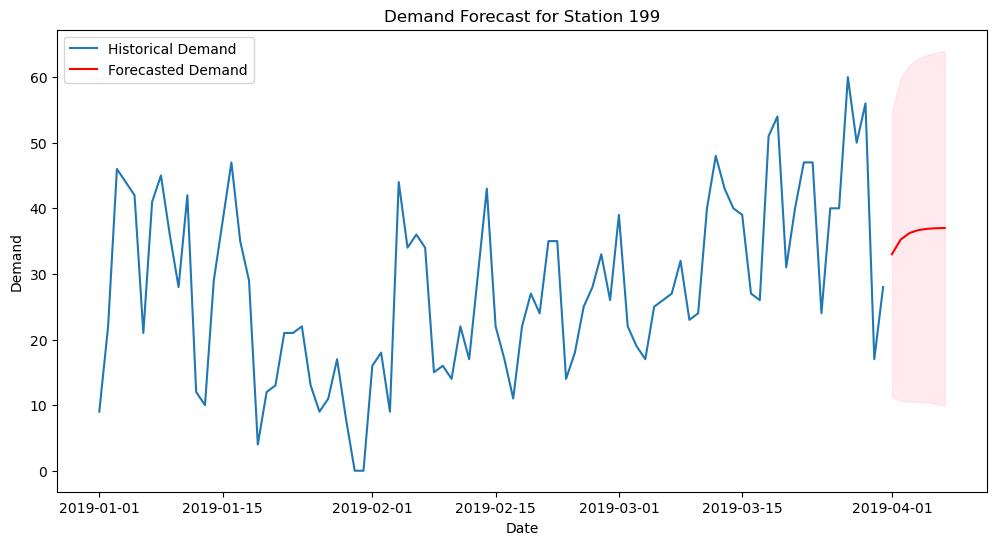

/Users/0x47/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MAE: 14.759968087666437
RMSE: 18.351821169681646


In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Load data
df = pd.read_csv('Divvy_Trips_2019_Q1.csv')

# 2. Convert time format, extract date, and aggregate demand
df['start_time'] = pd.to_datetime(df['start_time'])
df['date'] = df['start_time'].dt.date

# Analyze demand for a specific station, e.g., from_station_id = 199
station_id = 199
station_data = df[df['from_station_id'] == station_id].groupby('date').size()

# 3. Set date as index and construct time series data
time_series = station_data.asfreq('D', fill_value=0)

# 4. Check time series stationarity (ADF test)
result = adfuller(time_series)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
# If p-value < 0.05, the series is stationary; otherwise, differencing may be needed

# 5. Automatically select ARIMA model parameters
auto_arima_model = auto_arima(time_series, seasonal=False, trace=True)
print(auto_arima_model.summary())

# 6. Fit ARIMA model with best parameters
order = auto_arima_model.order
model = ARIMA(time_series, order=order)
arima_result = model.fit()

# 7. Forecast future demand (e.g., next 7 days)
forecast = arima_result.get_forecast(steps=7)
forecast_index = pd.date_range(time_series.index[-1] + pd.Timedelta(days=1), periods=7, freq='D')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# 8. Visualize results
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Historical Demand')
plt.plot(forecast_series, label='Forecasted Demand', color='red')
plt.fill_between(forecast_series.index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.title(f'Demand Forecast for Station {station_id}')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

# 9. Calculate error metrics
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]
model_train = ARIMA(train, order=order).fit()
pred_test = model_train.forecast(len(test))
mae = mean_absolute_error(test, pred_test)
rmse = np.sqrt(mean_squared_error(test, pred_test))
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')



2.SARIMA

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=705.629, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=700.084, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=696.161, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=703.655, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=699.546, Time=0.02 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=698.015, Time=0.15 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=696.606, Time=0.10 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=702.764, Time=0.04 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,2)(0,0,1)[7] intercept   : AIC=687.088, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=689.863, Time=0.03 sec
 ARIMA(0,1,2)(1,0,1)[7] intercept   : AIC=688.805, Time=0.11 se

 This problem is unconstrained.


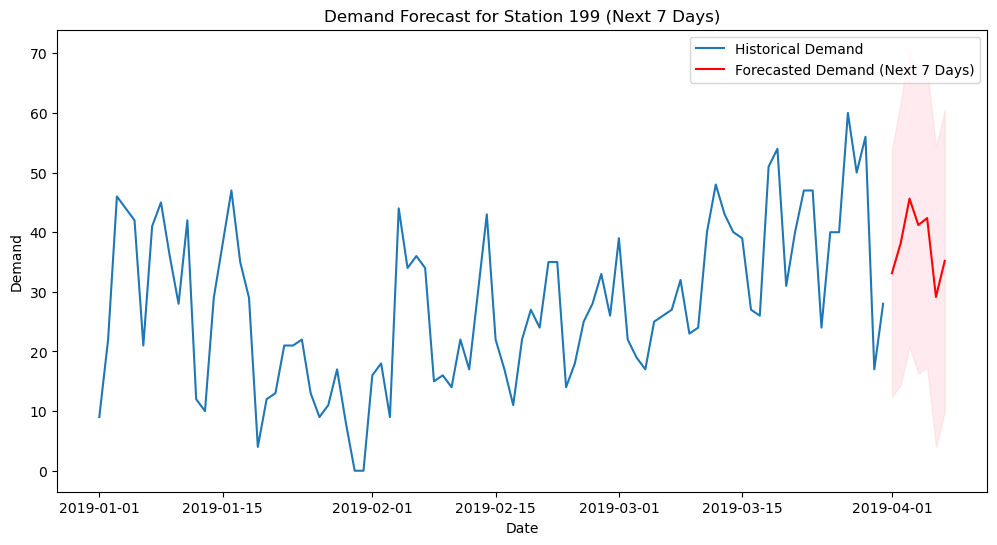

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import pandas as pd

# Assuming 'time_series' has already been prepared as a daily aggregated demand for a specific station

# Automatically select SARIMA model parameters with a weekly seasonality (m=7)
auto_sarima_model = auto_arima(time_series, seasonal=True, m=7, trace=True)
print(auto_sarima_model.summary())

# Fit SARIMA model with best parameters
order = auto_sarima_model.order
seasonal_order = auto_sarima_model.seasonal_order
sarima_model = SARIMAX(time_series, order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

# Forecast demand for the next 7 days
forecast = sarima_result.get_forecast(steps=7)
forecast_index = pd.date_range(time_series.index[-1] + pd.Timedelta(days=1), periods=7, freq='D')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Historical Demand')
plt.plot(forecast_series, label='Forecasted Demand (Next 7 Days)', color='red')
plt.fill_between(forecast_series.index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.title(f'Demand Forecast for Station {station_id} (Next 7 Days)')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()


3.XGBoost/Random Forest Regressor

Mean Absolute Error (MAE): 12.107058823529412
Root Mean Squared Error (RMSE): 14.627411012929679


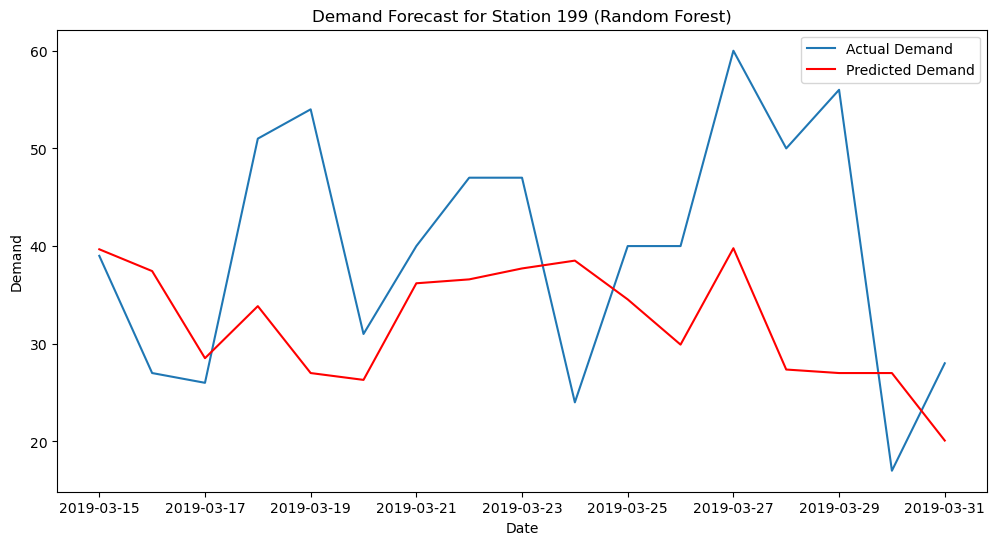

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Load data
df = pd.read_csv('Divvy_Trips_2019_Q1.csv')

# 2. Convert time format, extract date, and aggregate demand
df['start_time'] = pd.to_datetime(df['start_time'])
df['date'] = df['start_time'].dt.date

# Analyze demand for a specific station, e.g., from_station_id = 199
station_id = 199
station_data = df[df['from_station_id'] == station_id].groupby('date').size()

# 3. Set date as index and construct time series data
time_series = station_data.asfreq('D', fill_value=0)

# 4. Create lagged features (e.g., previous 1 day and previous 7 days)
time_series_df = time_series.to_frame(name='demand')
time_series_df['lag_1'] = time_series_df['demand'].shift(1)
time_series_df['lag_7'] = time_series_df['demand'].shift(7)
time_series_df = time_series_df.dropna()  # Drop NaN values caused by shifting

# 5. Prepare features and labels
X = time_series_df[['lag_1', 'lag_7']]
y = time_series_df['demand']

# 6. Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 7. Train RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 8. Make predictions
y_pred = rf_model.predict(X_test)

# 9. Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# 10. Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Demand')
plt.plot(y_test.index, y_pred, label='Predicted Demand', color='red')
plt.title(f'Demand Forecast for Station {station_id} (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()


LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# 1. 数据读取
data = pd.read_csv('Divvy_Trips_2019_Q1.csv')

# 2. 数据预处理
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

# 选择目标站点
station_id = 199

# 3. 计算出入站次数
# 出站记录
outgoing = data[data['from_station_id'] == station_id]
# 入站记录
incoming = data[data['to_station_id'] == station_id]

# 合并出入站记录
outgoing['net_flow'] = -1
incoming['net_flow'] = 1
station_data = pd.concat([outgoing[['start_time', 'net_flow']], incoming[['start_time', 'net_flow']]])

# 按小时聚合数据
station_data.set_index('start_time', inplace=True)
net_flow = station_data['net_flow'].resample('H').sum().fillna(0)

# 4. 特征缩放
scaler = MinMaxScaler(feature_range=(0, 1))
net_flow_scaled = scaler.fit_transform(net_flow.values.reshape(-1, 1))

# 5. 创建数据集
def create_dataset(dataset, look_back=24):
    X, Y = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 24  # 使用过去24小时的数据预测下一小时
X, y = create_dataset(net_flow_scaled, look_back)

# 6. 数据集划分
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 7. 调整输入形状 [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 8. 建立LSTM模型
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# 9. 训练模型
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# 10. 预测与评估
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# 计算RMSE
rmse = np.sqrt(np.mean((y_pred_inv - y_test_inv) ** 2))
print(f'测试集RMSE: {rmse}')

# 11. 可视化结果
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='真实值')
plt.plot(y_pred_inv, label='预测值')
plt.xlabel('时间')
plt.ylabel('净流量')
plt.title('LSTM模型预测结果')
plt.legend()
plt.show()

# 12. 预测未来一周的净流量
last_hours = net_flow_scaled[-look_back:]
prediction_list = last_hours.tolist()

for _ in range(7 * 24):  # 预测未来7天（168小时）
    x = np.array(prediction_list[-look_back:])
    x = x.reshape((1, look_back, 1))
    out = model.predict(x)[0][0]
    prediction_list.append([out])

prediction_list = np.array(prediction_list[look_back:])
prediction_inv = scaler.inverse_transform(prediction_list)

# 创建未来日期索引
last_date = net_flow.index[-1]
future_dates = [last_date + datetime.timedelta(hours=i+1) for i in range(7*24)]

# 可视化未来一周的预测
plt.figure(figsize=(12,6))
plt.plot(future_dates, prediction_inv, label='未来一周预测净流量')
plt.xlabel('日期')
plt.ylabel('净流量')
plt.title(f'站点 {station_id} 未来一周的净流量预测（LSTM）')
plt.legend()
plt.show()


ImportError: dlopen(/Users/0x47/anaconda3/envs/tensorflow/lib/python3.9/site-packages/matplotlib/_c_internal_utils.cpython-39-darwin.so, 0x0002): tried: '/Users/0x47/anaconda3/envs/tensorflow/lib/python3.9/site-packages/matplotlib/_c_internal_utils.cpython-39-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64e' or 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/Users/0x47/anaconda3/envs/tensorflow/lib/python3.9/site-packages/matplotlib/_c_internal_utils.cpython-39-darwin.so' (no such file), '/Users/0x47/anaconda3/envs/tensorflow/lib/python3.9/site-packages/matplotlib/_c_internal_utils.cpython-39-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64e' or 'arm64'))